### Student Perfromance Indicator

Life Cycle of Machine Learnings Project

    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model

1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

    2.1 Import Data and Required Packages

    Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV data as panda dataframe

In [4]:
df = pd.read_csv("data/stud.csv")

### Top Ten Samples

In [5]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Shape of Dataset

In [6]:
df.shape

(1000, 8)

The dataset contains 1000 saples (rows) and 8 features (columns)

### 2.2 Dataset Information
    gender : sex of student (Male/Female)
    race_ethinicity : race/ethinicity of student (group A, B, C, D, E)
    parental_level_of_education : parents highest level of Education(Masters, Behchelors, some college, high school, associate's degree)
    lunch : had lunch before test(standard, free/reduced)
    test_preparation_course : complete or not complete before test
    math score
    reading score
    writing score

### 3. Data Checks to Perform 
    check Missing values
    check duplicates
    check data types
    check the number of unique value in each column
    check statistics of data
    check various categories present in categorical column

#### 3.1 Check Missing Values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing Values in the dataset

### 3.2 Check Duplicates values

In [8]:
df.duplicated().sum()

0

There is no duplicae values in the dataset

#### Check Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique value in each columns

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check Statistics of Data

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
    All the means are very close to each other in the range 66.6 to 70
    Standard deviation are also very close - between 14.6 to 15.19
    Min of math is 0 Whereas for reading and writing 17 and 10 respectively

#### 3.6 Exploring Data

#####  Checking Unique Values

In [12]:
for column in df.columns:
    print(column)
    print(df[column].unique())
    print('-'*70)

gender
['female' 'male']
----------------------------------------------------------------------
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------------------------------------
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------------------------------------
lunch
['standard' 'free/reduced']
----------------------------------------------------------------------
test_preparation_course
['none' 'completed']
----------------------------------------------------------------------
math_score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23 

In [13]:
### defining numerical and categorical columns 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("we have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features ))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.7 Creating 'total_score' and 'average_score' featuers

In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full_score = len(df[df['math_score'] == 100])
reading_full_score = len(df[df['reading_score'] == 100])
writing_full_score = len(df[df['writing_score'] == 100])

print('Number of Students scored full in math ', math_full_score)
print('Number of Students scored full in reading', reading_full_score)
print('Nmber of Students scored full in writing ', writing_full_score)

Number of Students scored full in math  7
Number of Students scored full in reading 17
Nmber of Students scored full in writing  14


In [16]:
math_less_20 = len(df[df['math_score'] <=20])
reading_less_20 = len(df[df['reading_score'] <= 20])
writing_less_20 = len(df[df['writing_score'] <20])

print('Number of Students scored <= 20 in math ',math_less_20 )
print('Number of Students scored <=20 in reading ', reading_less_20)
print('NUmber of Students scored <=20 in writing ', writing_less_20)

Number of Students scored <= 20 in math  4
Number of Students scored <=20 in reading  1
NUmber of Students scored <=20 in writing  3


#### Insight 
    Students have scored less in math
    In reading students scored very well.

## 4. Exploring Data (visulaization)

### 4.1 Visualize average score distribution to make conclusion

#### Distribution of average_score and Distribution of average_score with respect to gender

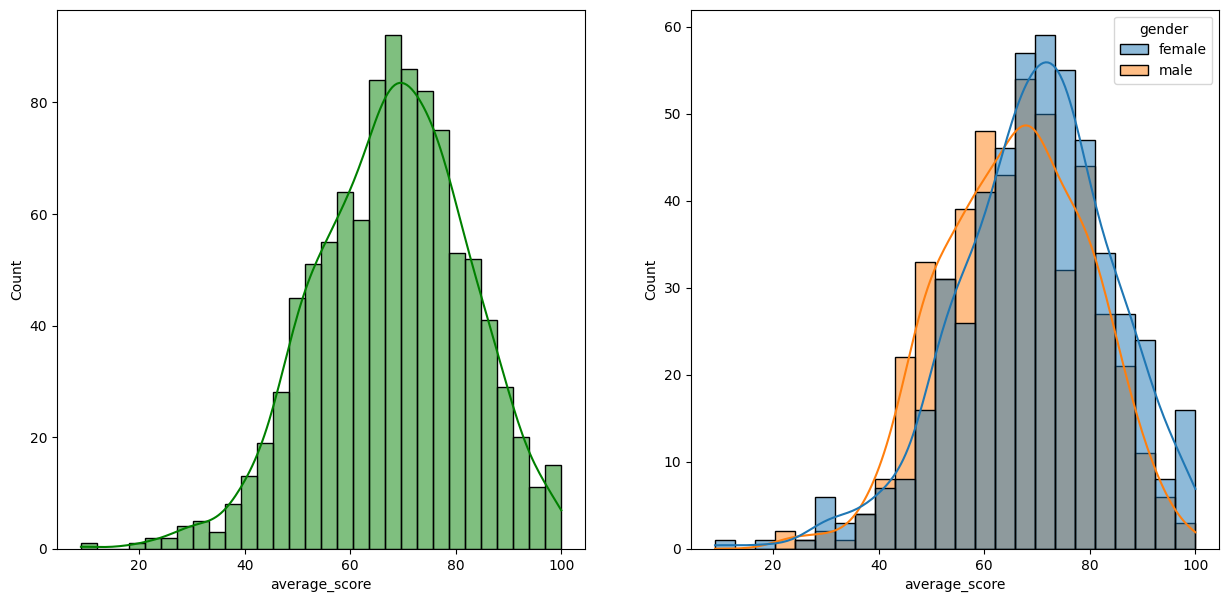

In [17]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'gender')
plt.show()

#### Distribution of total_score and Distribution of total_score with repsect to gender

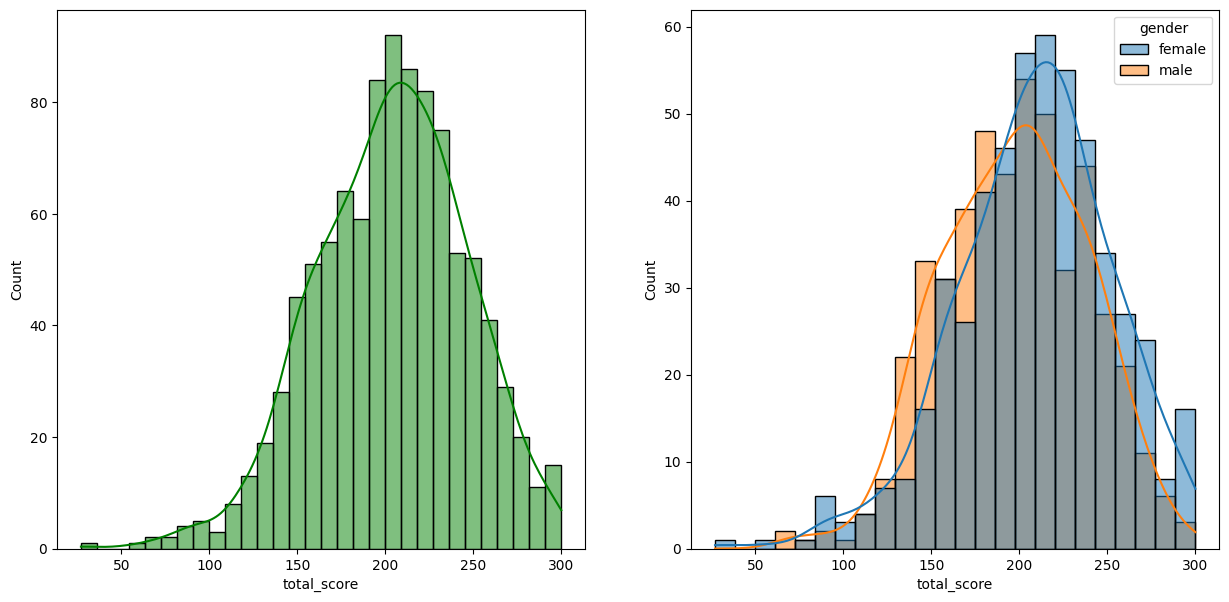

In [18]:
fig, axs = plt.subplots(1,2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

##### From the above figure 2, males scored high under mean and females scored more above mean

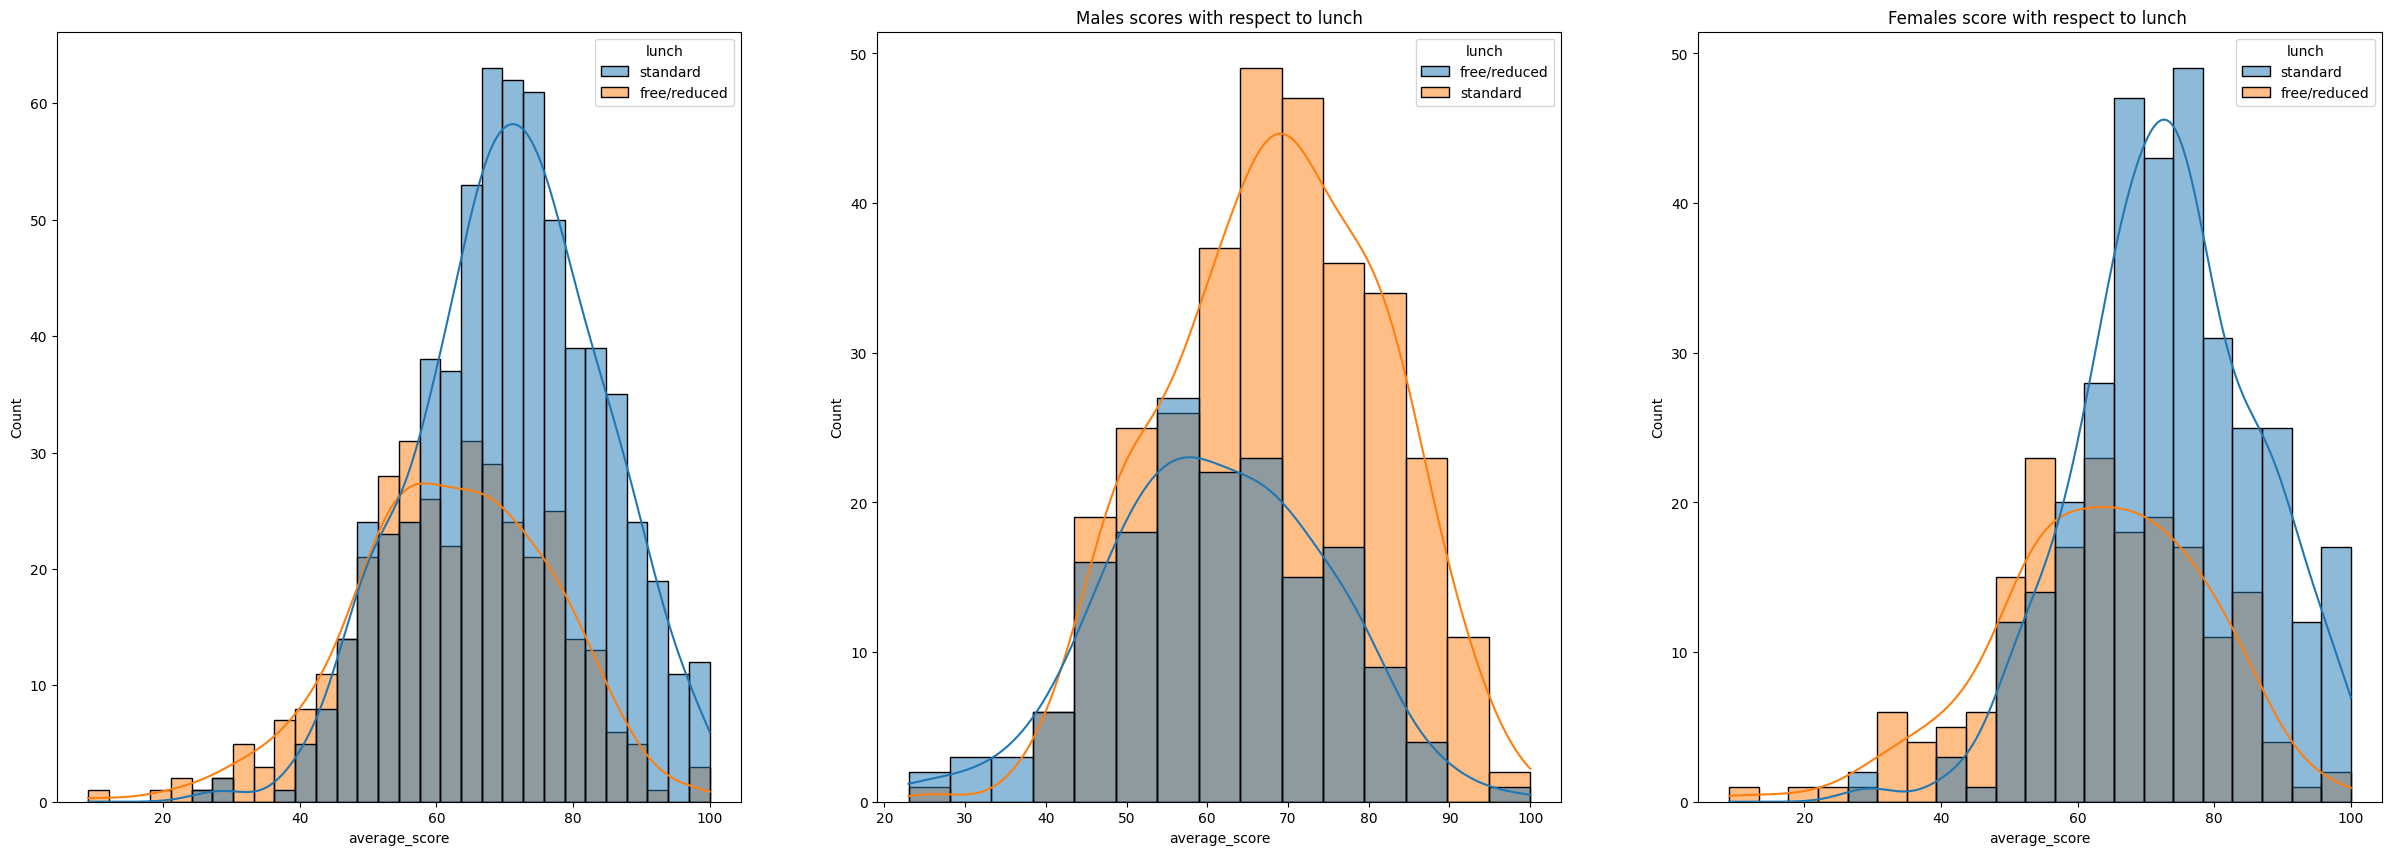

In [19]:
fig, axs = plt.subplots(1,3, figsize = (30, 10))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, bins = 30, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'lunch')
plt.title('Males scores with respect to lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.title('Females score with respect to lunch ')
plt.show()

#### Insight 
    from the figure 1, Students who had standard lunch scored more.
    from the figure 2, Male students who had standard lunch scored more.
    from the figure 3, Female students who had standard lunch scored more.
    In conclusion, Students who had standard lunch scores more.

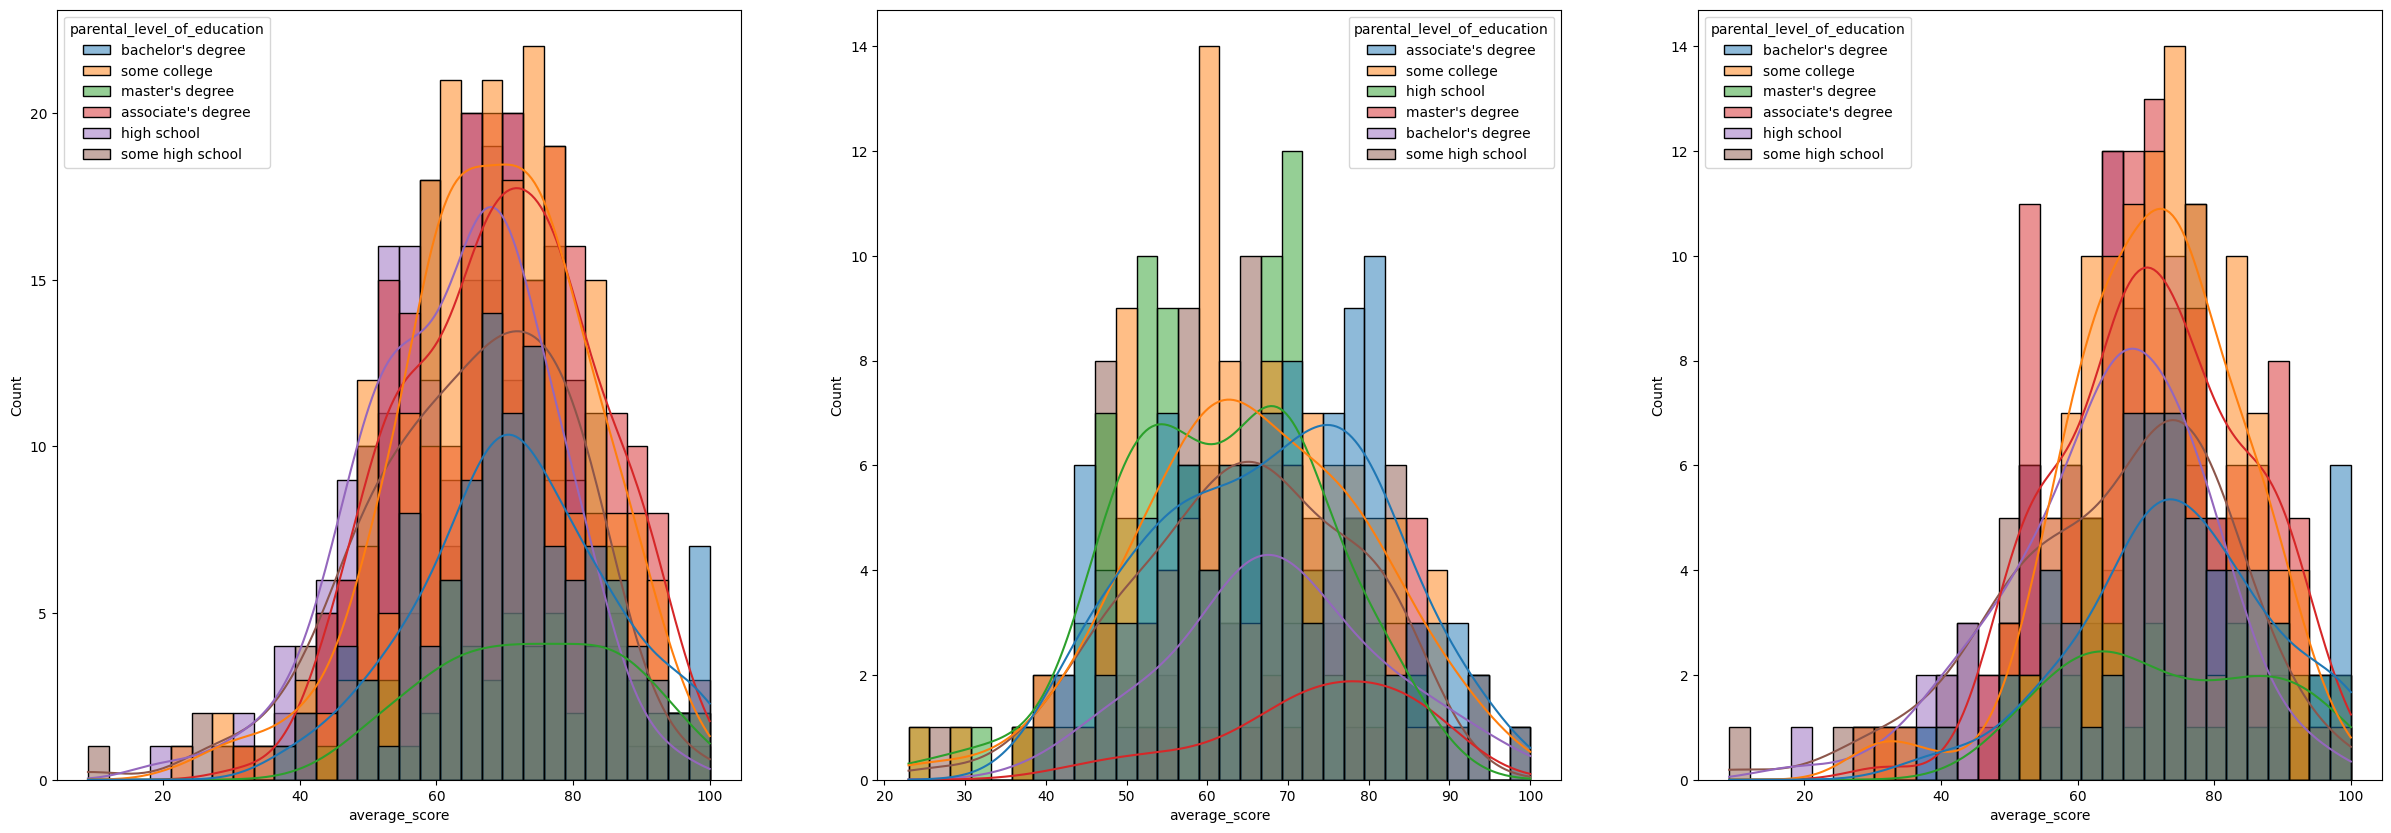

In [20]:
fig, axs = plt.subplots(1,4, figsize=(30, 10))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', bins = 30, kde = True, hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', bins = 30, kde = True, hue = 'parental_level_of_education' )
plt.show()

#### Insight
    overall, pareantal_level_of_education doest not affect student scores. Whereas, in case of male students parents with associate's degree or master's degree tend to perform well.

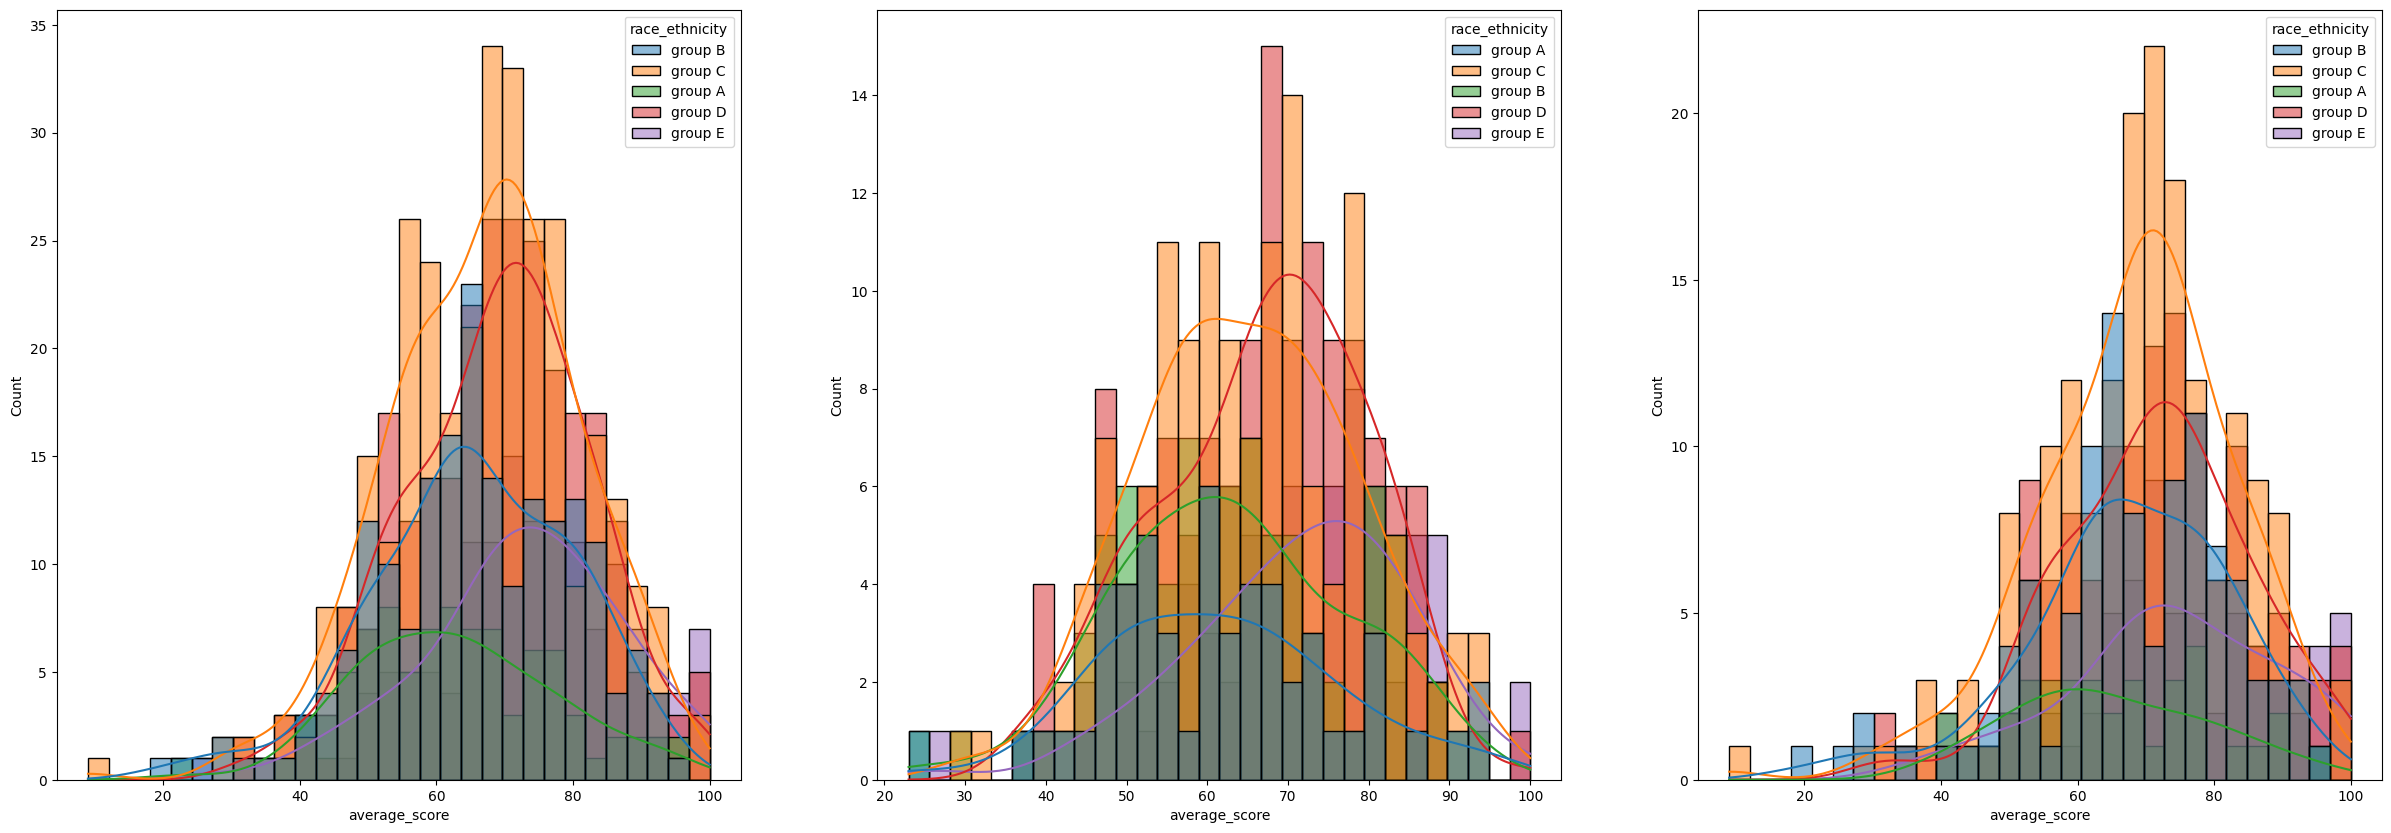

In [21]:
fig, axs = plt.subplots(1,3, figsize=(30, 10))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', bins = 30, kde = True, hue = 'race_ethnicity')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', bins = 30, kde = True, hue = 'race_ethnicity')
plt.show()

#### Insight
    overall, race_ethnicity C, D and E perfrom well.
    In case of males group D and E scored more than the rest of the groups.
    In case of females group C and E scored more than rest of the groups.

### 4.2 Maximum score of students in all subjects

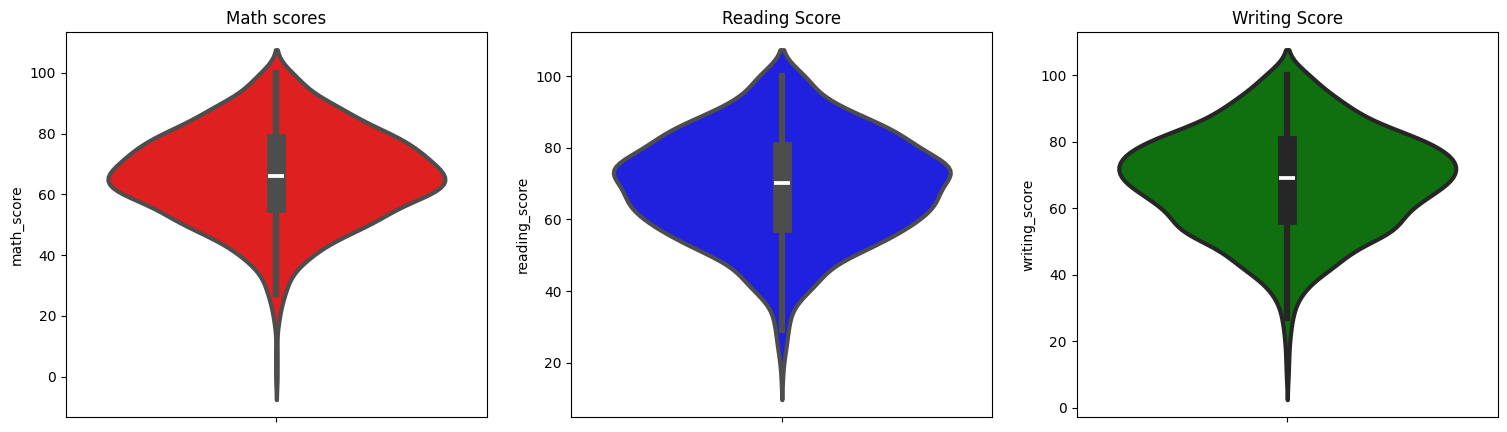

In [22]:
plt.figure(figsize = (25, 5))
plt.subplot(1, 4, 1)
plt.title('Math scores')
sns.violinplot(data = df, y = 'math_score', color = 'red', linewidth= 3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(data = df, y = 'reading_score', color = 'blue', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(data = df, y = 'writing_score', color = 'green', linewidth=3 )

plt.show()

#### Insight
    Most students scored in range of 55-80 in math. whereas,in reading and writing this range is 60-80 for both.

### 4.3 Multivariate Analysis

#### Finding categories count of each category in different columns.

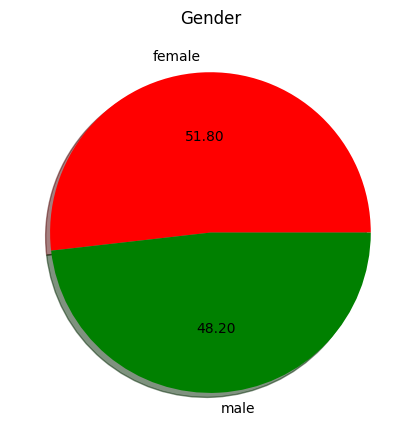

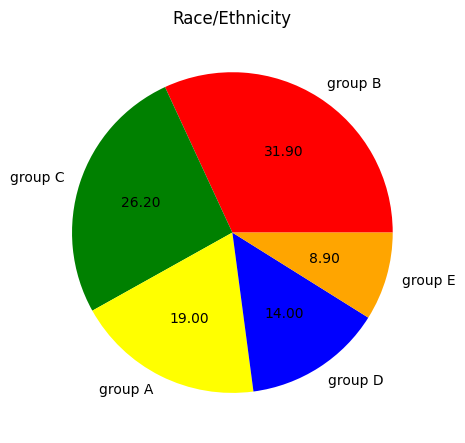

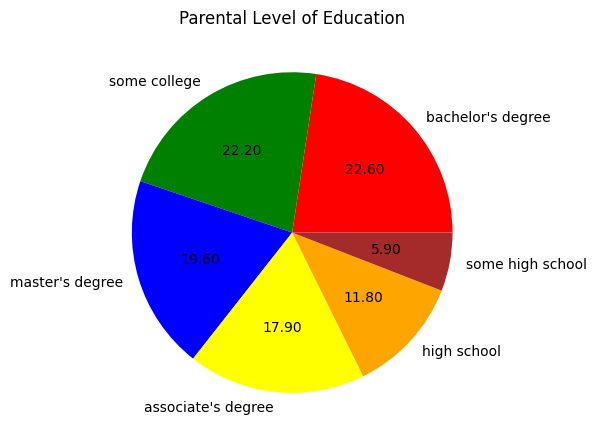

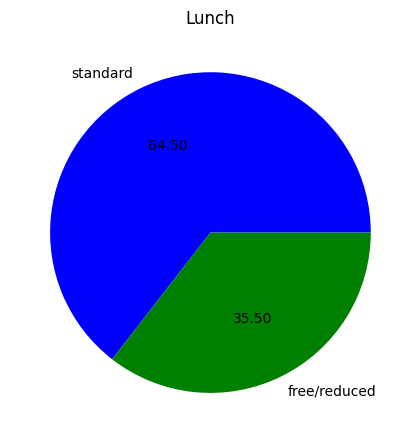

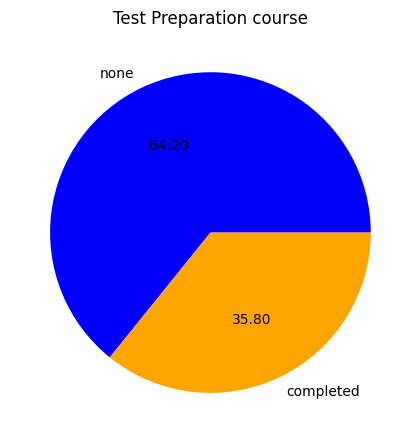

In [23]:
plt.rcParams['figure.figsize'] = (30, 10)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = df['gender'].unique()
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f', shadow=True)
plt.title('Gender')
plt.show()



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].unique()
color = ['red', 'green', 'yellow', 'blue', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f')
plt.title('Race/Ethnicity')
plt.show()



plt.subplot(1, 5, 3)
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].unique()
color = ['red', 'green', 'blue', 'yellow', 'orange', 'brown']

plt.pie(size, labels = labels, colors = color, autopct = '%.2f')
plt.title('Parental Level of Education')
plt.show()



plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = df['lunch'].unique()
color = ['blue', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f')
plt.title('Lunch')
plt.show()



plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].unique()
color = ['blue', 'orange']

plt.pie(size, labels = labels, colors = color, autopct = '%.2f')
plt.title('Test Preparation course')
plt.show()


#### Insight
    In Gender column males and females samples are almost equal.
    In Race/Ethnicity column Group B is the most occured with 31.90%. Whereas, Group at 8.9%
    In Parental Level of Education all level of educations are almost equal except some school.
    In Lunch 64.5% of students had standard lunch.
    In Test preparation course 64.20% of students are not enrolled in test preparation course.

### 4.4 Analysis of each features

#### 4.4.1 Gender Column

How gender column is distributed?

Does gender has any impact on student performance?

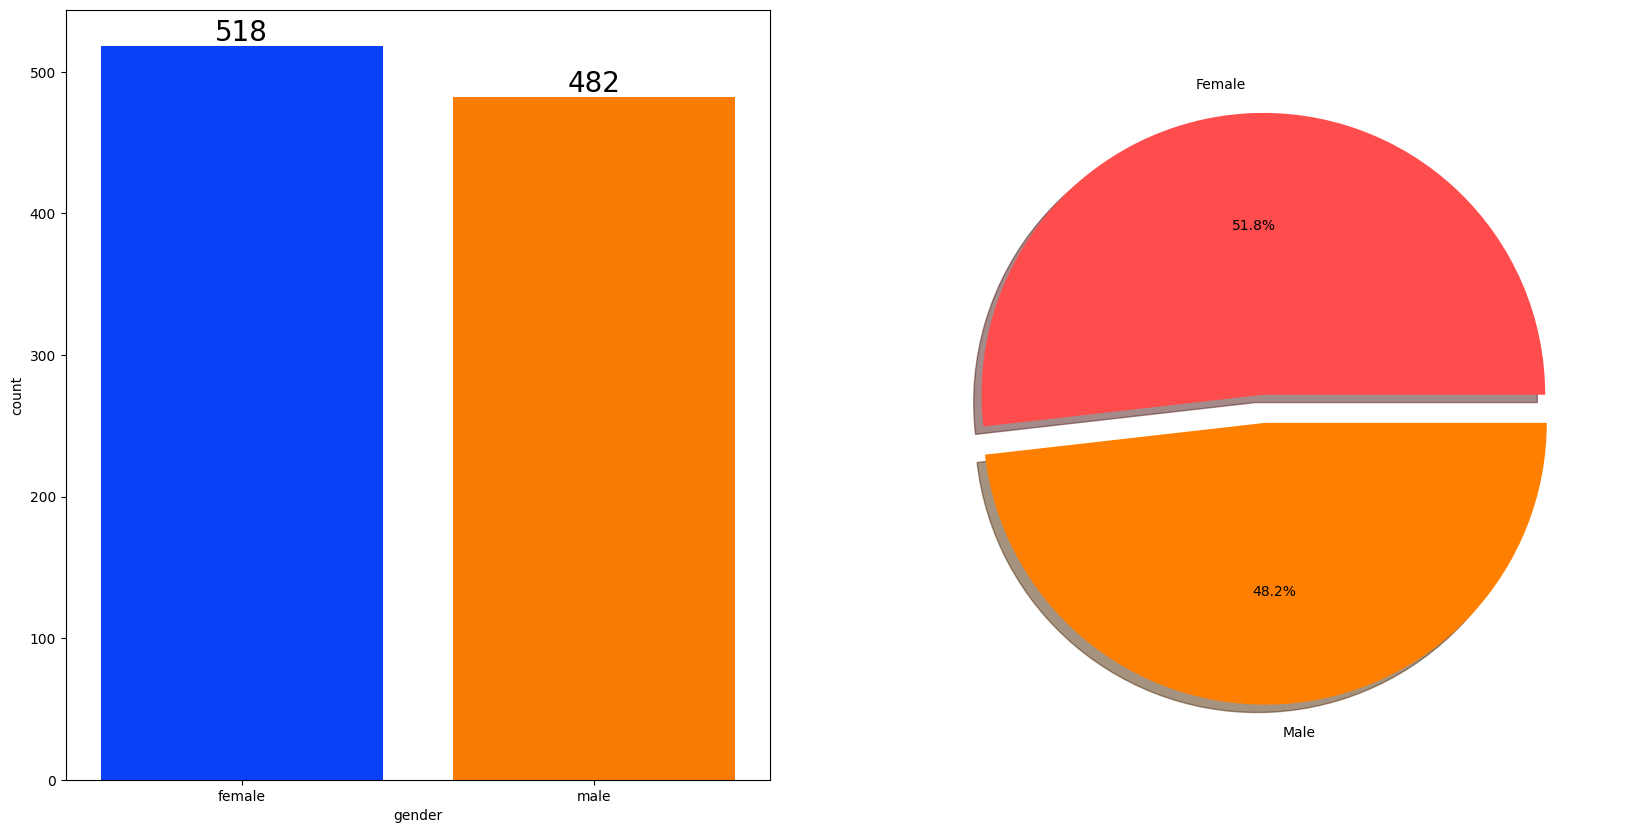

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with 528 feamles(51.8%) and 482 males(48.2%)

 Bivariate Analysis(How Gender is impact total_score and average_score?)

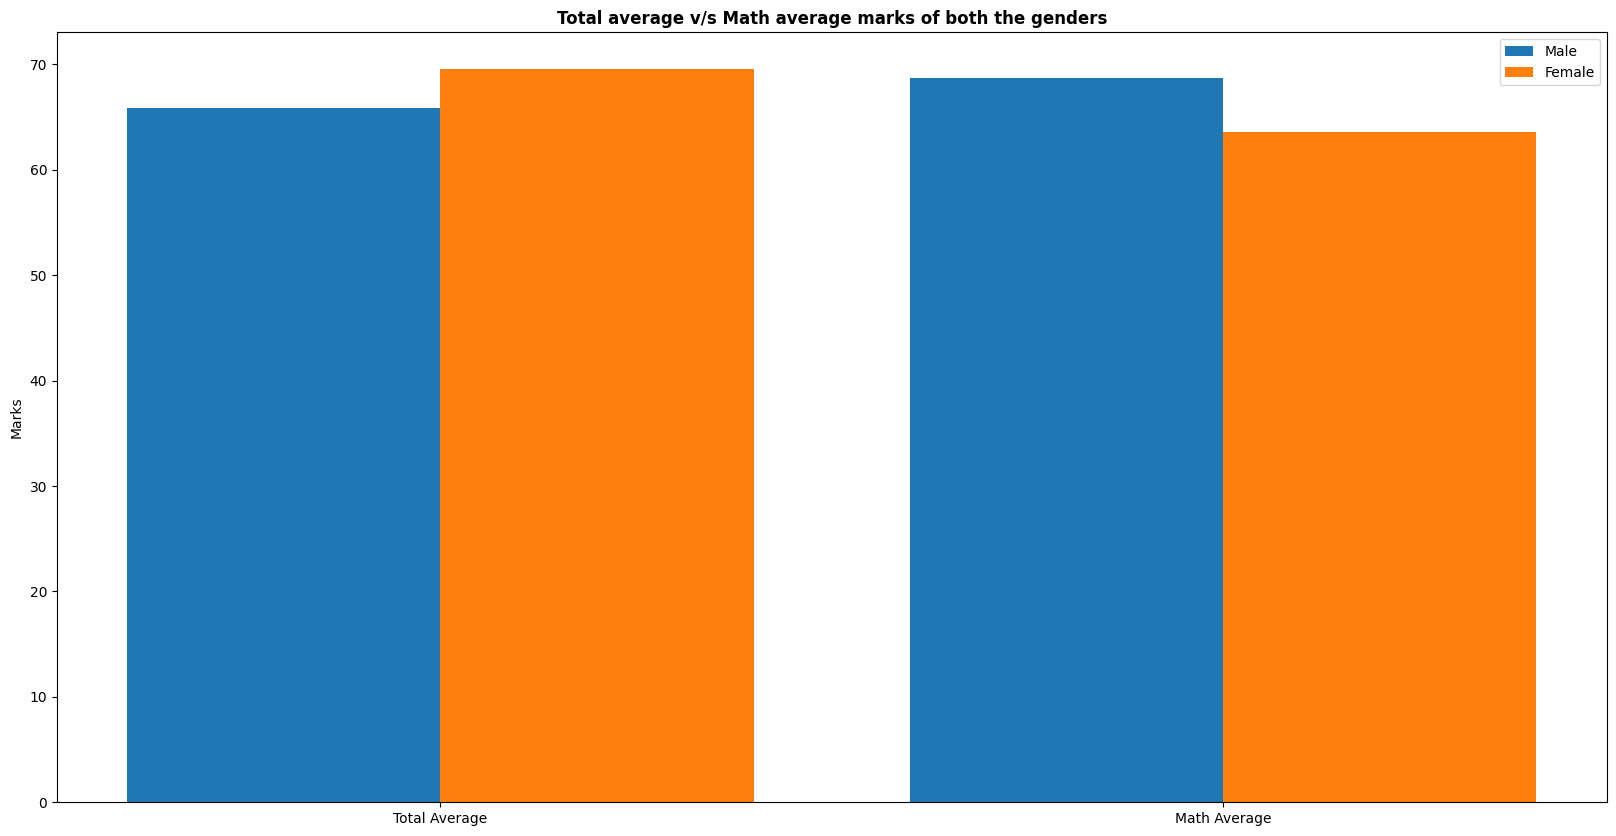

In [25]:
plt.figure(figsize=(20,10))
females_scores = [df[df['gender']=='female']['average_score'].mean(), df[df['gender']== 'female']['math_score'].mean()]
males_scores = [df[df['gender']== 'male']['average_score'].mean(), df[df['gender']=='male']['math_score'].mean()]

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, males_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, females_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

<Axes: xlabel='gender'>

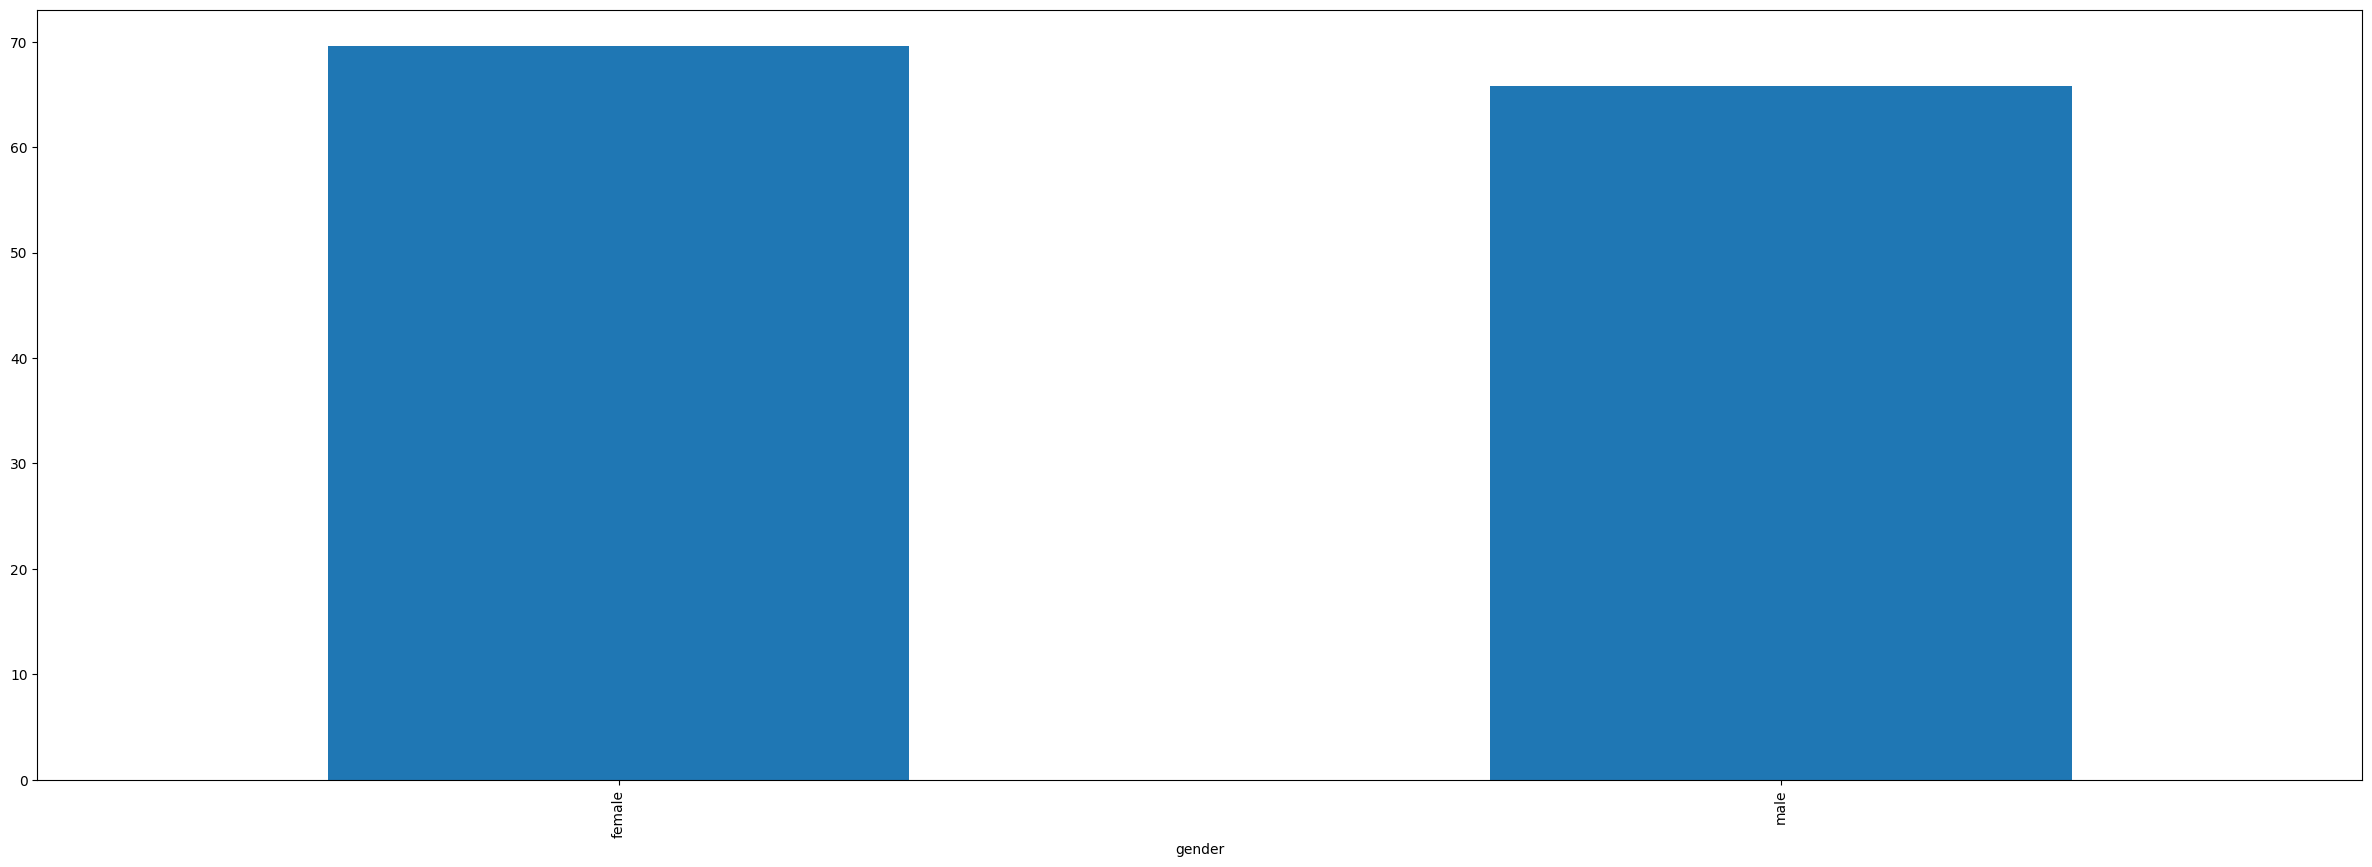

In [26]:
df.groupby('gender')['average_score'].mean().plot(kind = 'bar')

The mean score of total_score for female is higher than males. Whereas the math score average is high for males.

#### 4.4.2 Race/Ethnicity
    Distribution of Race and Ethnicity
    How race and ethnicity impact the score in each subject.

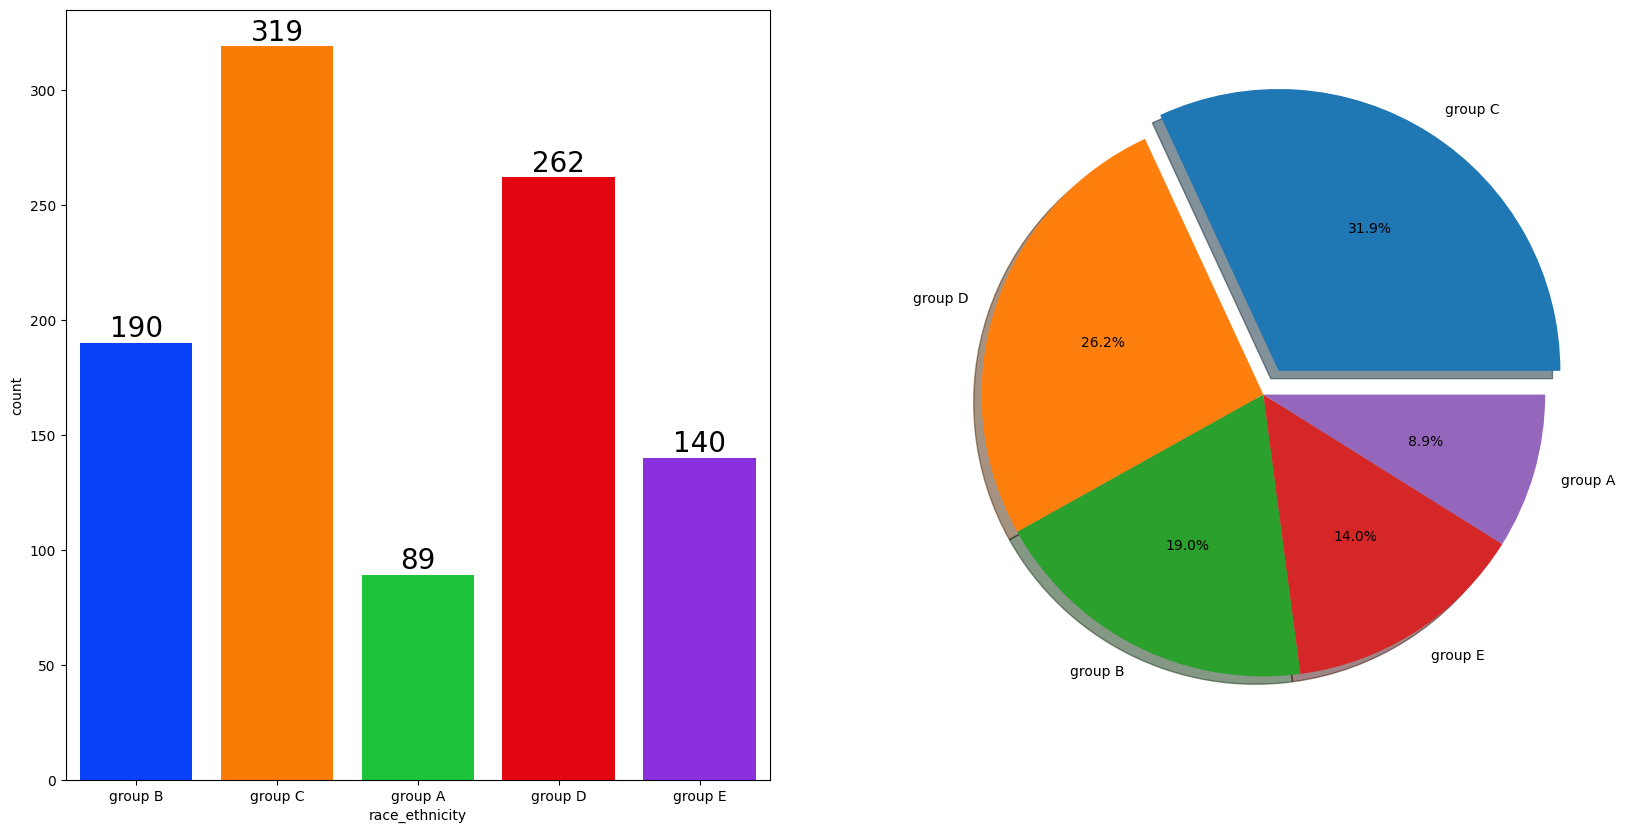

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Most students are from Group C and D
lowest number of student are from group A

#### Bivariate Analysis

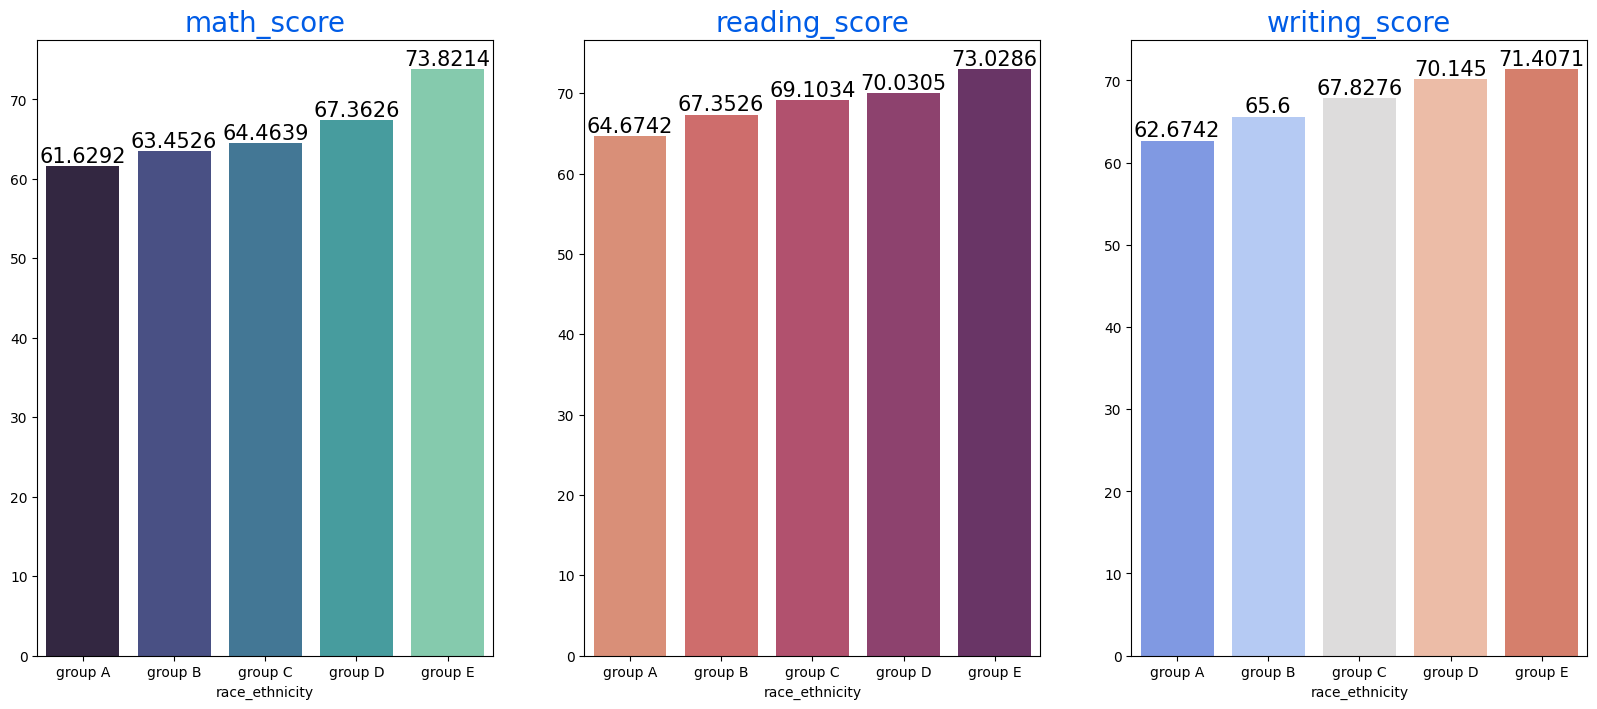

In [28]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group A average in all subjects are the lowest.
Group E average in all subject are the highest.

#### 4.4.3 Parental Level of Education
    Distribution of Parental Level of Education in dataset.
    How Parental education level impact total score?

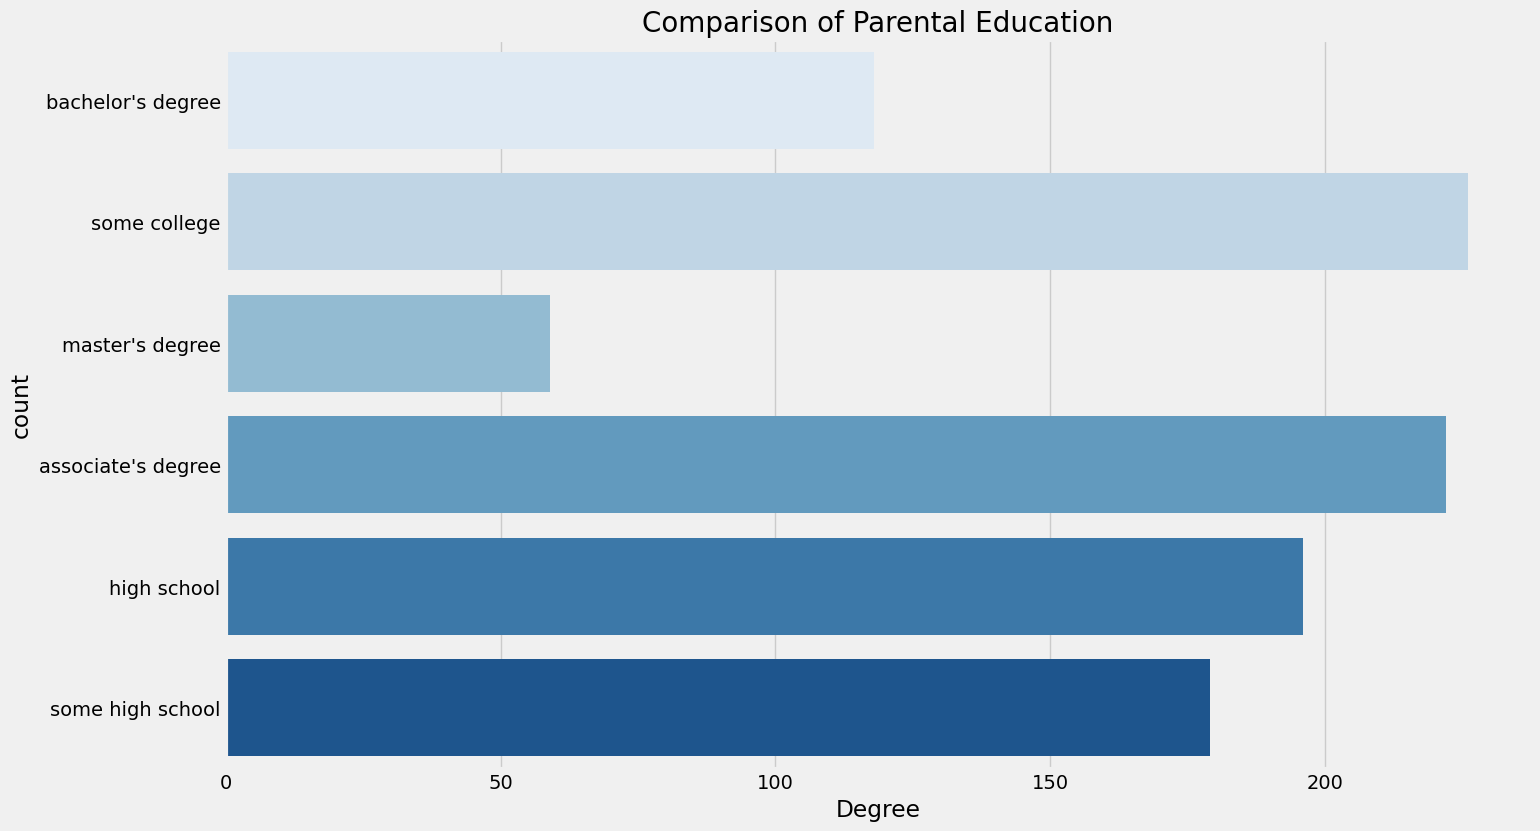

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Students with parents have some college or associate's degree education are tend to perform well

<Axes: xlabel='parental_level_of_education'>

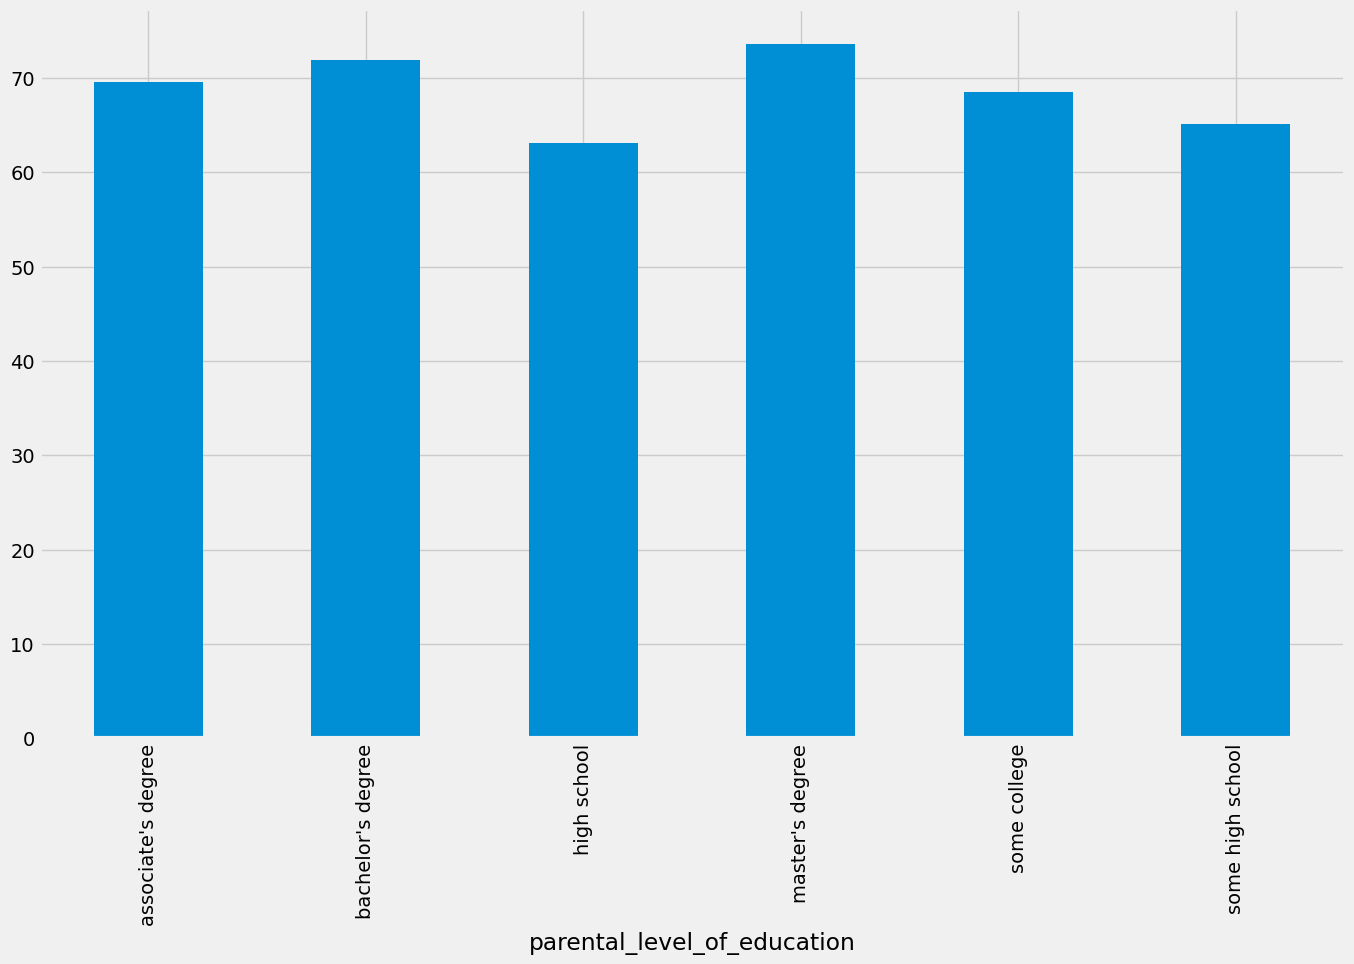

In [30]:
df.groupby('parental_level_of_education')['average_score'].mean().plot(kind = 'bar')

### 4.4.4 Lunch

Which type of lunch is most common?
What is the impact of lunch on score?

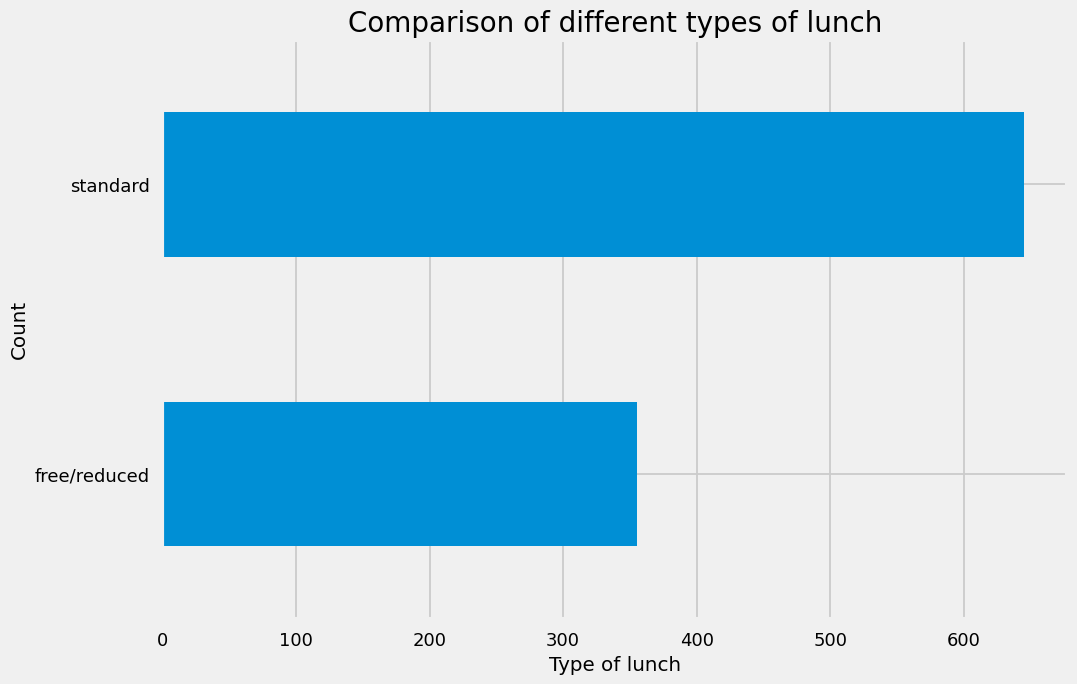

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
df.groupby('lunch').size().plot(kind = 'barh')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Type of lunch')
plt.ylabel('Count')
plt.show()

Insight

Most students had standard lunch.

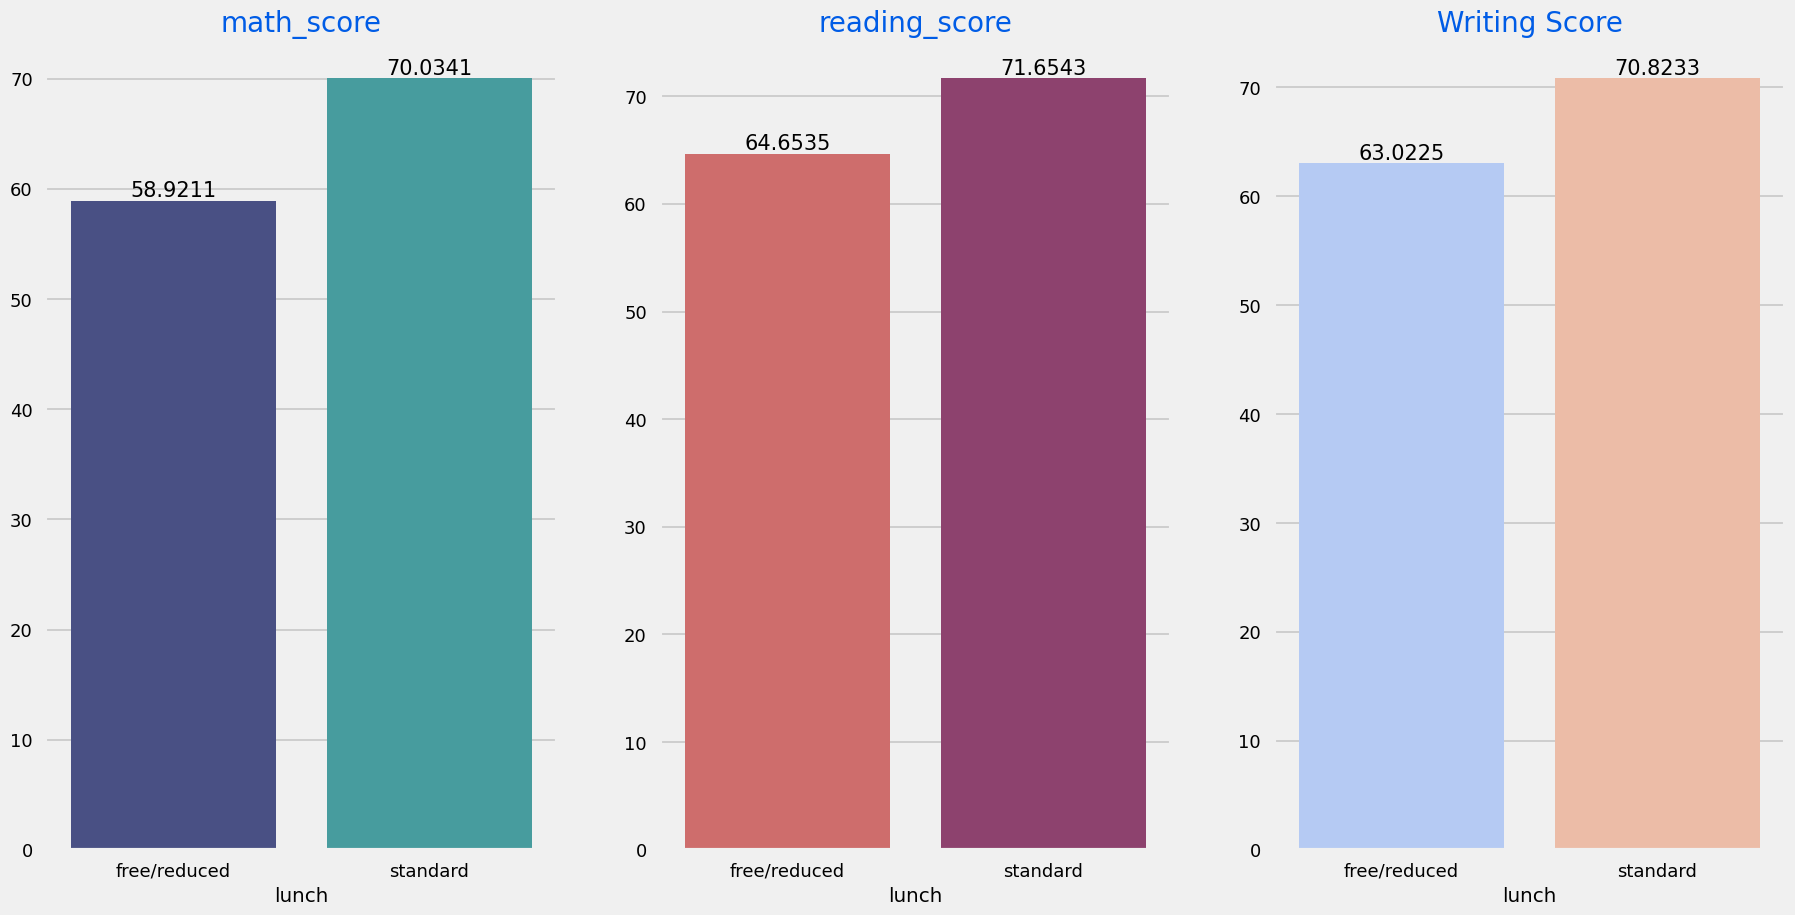

In [32]:
group_data = df.groupby('lunch')
f, ax = plt.subplots(1,3, figsize=(20,10))
sns.barplot(x = group_data['math_score'].mean().index, y = group_data['math_score'].mean().values, palette='mako', ax = ax[0])
ax[0].set_title('math_score', color = '#005ce6', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, size = 15)

sns.barplot(x = group_data['reading_score'].mean().index, y = group_data['reading_score'].mean().values, palette= 'flare', ax = ax[1])
ax[1].set_title('reading_score', color = '#005ce6', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


sns.barplot(x = group_data['writing_score'].mean().index, y = group_data['writing_score'].mean().values, palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing Score', color = '#005ce6', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black', size = 15)

Insight

Students who had standard lunch scored more in all subject.

#### 4.4.5 TEST PREPARATION COURSE 

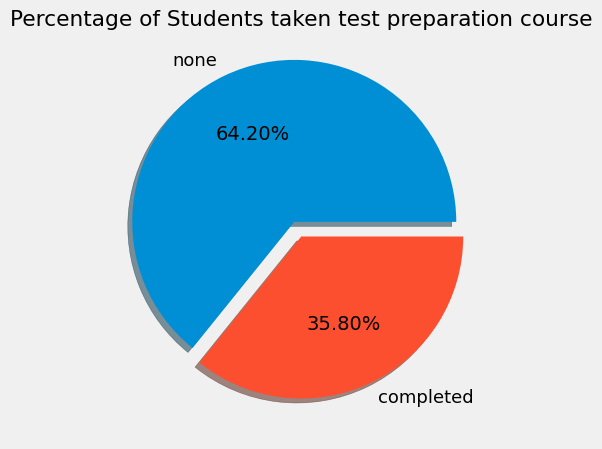

In [37]:
plt.figure(figsize=(5,5))
plt.pie(x = df['test_preparation_course'].value_counts(), labels = df['test_preparation_course'].value_counts().index, explode=[0.1, 0], autopct='%.2f%%', shadow = True)
plt.title('Percentage of Students taken test preparation course')
plt.show()

Insight 

64.20% students did not take test preparation course.

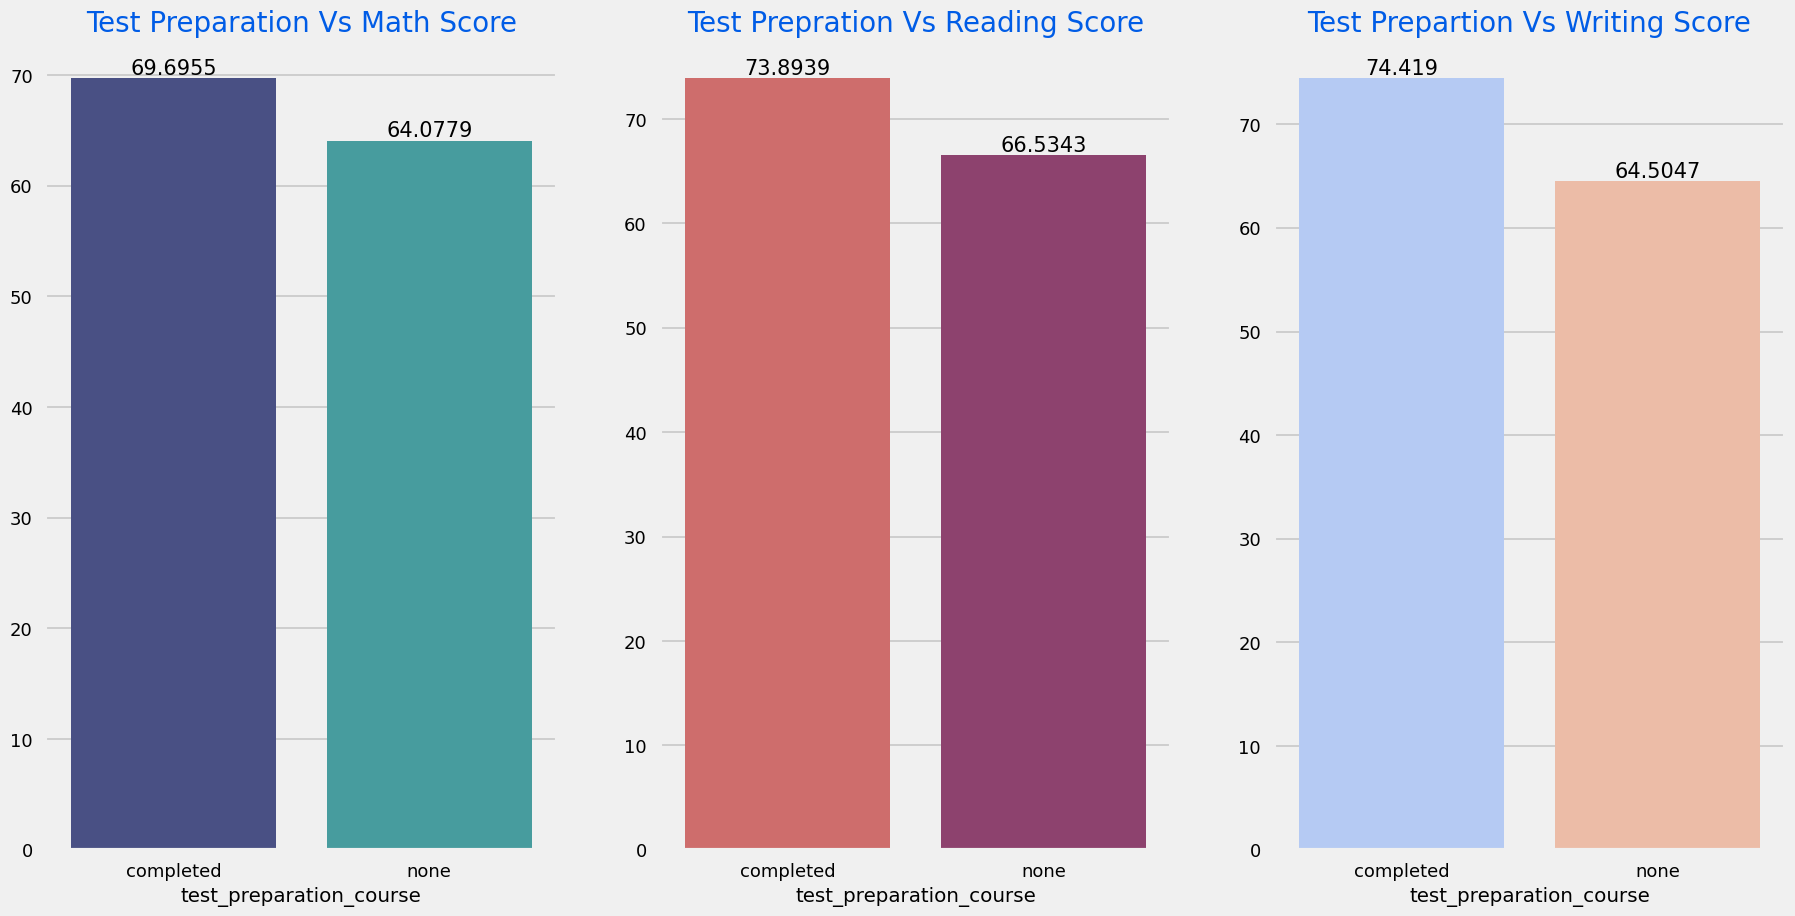

In [54]:
group_data = df.groupby('test_preparation_course')
f, ax = plt.subplots(1,3, figsize=(20,10))
sns.barplot(x = group_data['math_score'].mean().index, y = group_data['math_score'].mean().values, palette= 'mako', ax = ax[0])
ax[0].set_title('Test Preparation Vs Math Score', size = 20, color = '#005ce6')

for container in ax[0].containers:
    ax[0].bar_label(container, size = 15)

sns.barplot(x = group_data['reading_score'].mean().index,y = group_data['reading_score'].mean().values, palette='flare', ax = ax[1])
ax[1].set_title('Test Prepration Vs Reading Score', size = 20, color = '#005ce6')

for container in ax[1].containers:
    ax[1].bar_label(container, size = 15)


sns.barplot(x = group_data['writing_score'].mean().index, y = group_data['writing_score'].mean().values, palette='coolwarm', ax = ax[2])
ax[2].set_title('Test Prepartion Vs Writing Score', size = 20, color = '#005ce6')

for container in ax[2].containers:
    ax[2].bar_label(container, size = 15, color = 'black')


Insight

Completing Test prepartion course helps in score more all subjects.

#### 4.4.5 Checking for Outliers

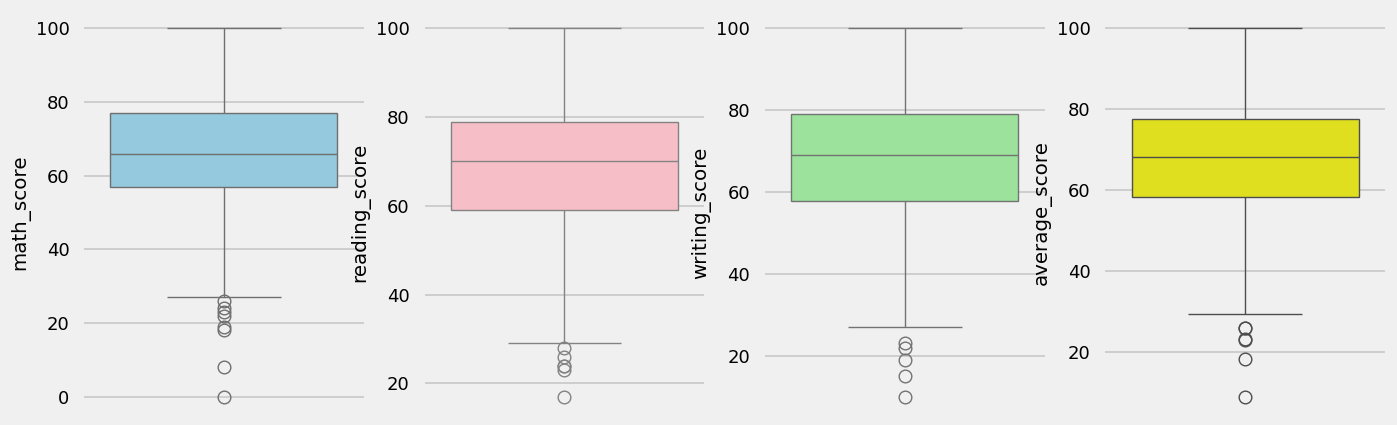

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'lightpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'lightgreen')
plt.subplot(144)
sns.boxplot(df['average_score'], color = 'yellow')
plt.show()


#### 4.4.6 Multivariate Analysis using Pairplot

<function matplotlib.pyplot.show(close=None, block=None)>

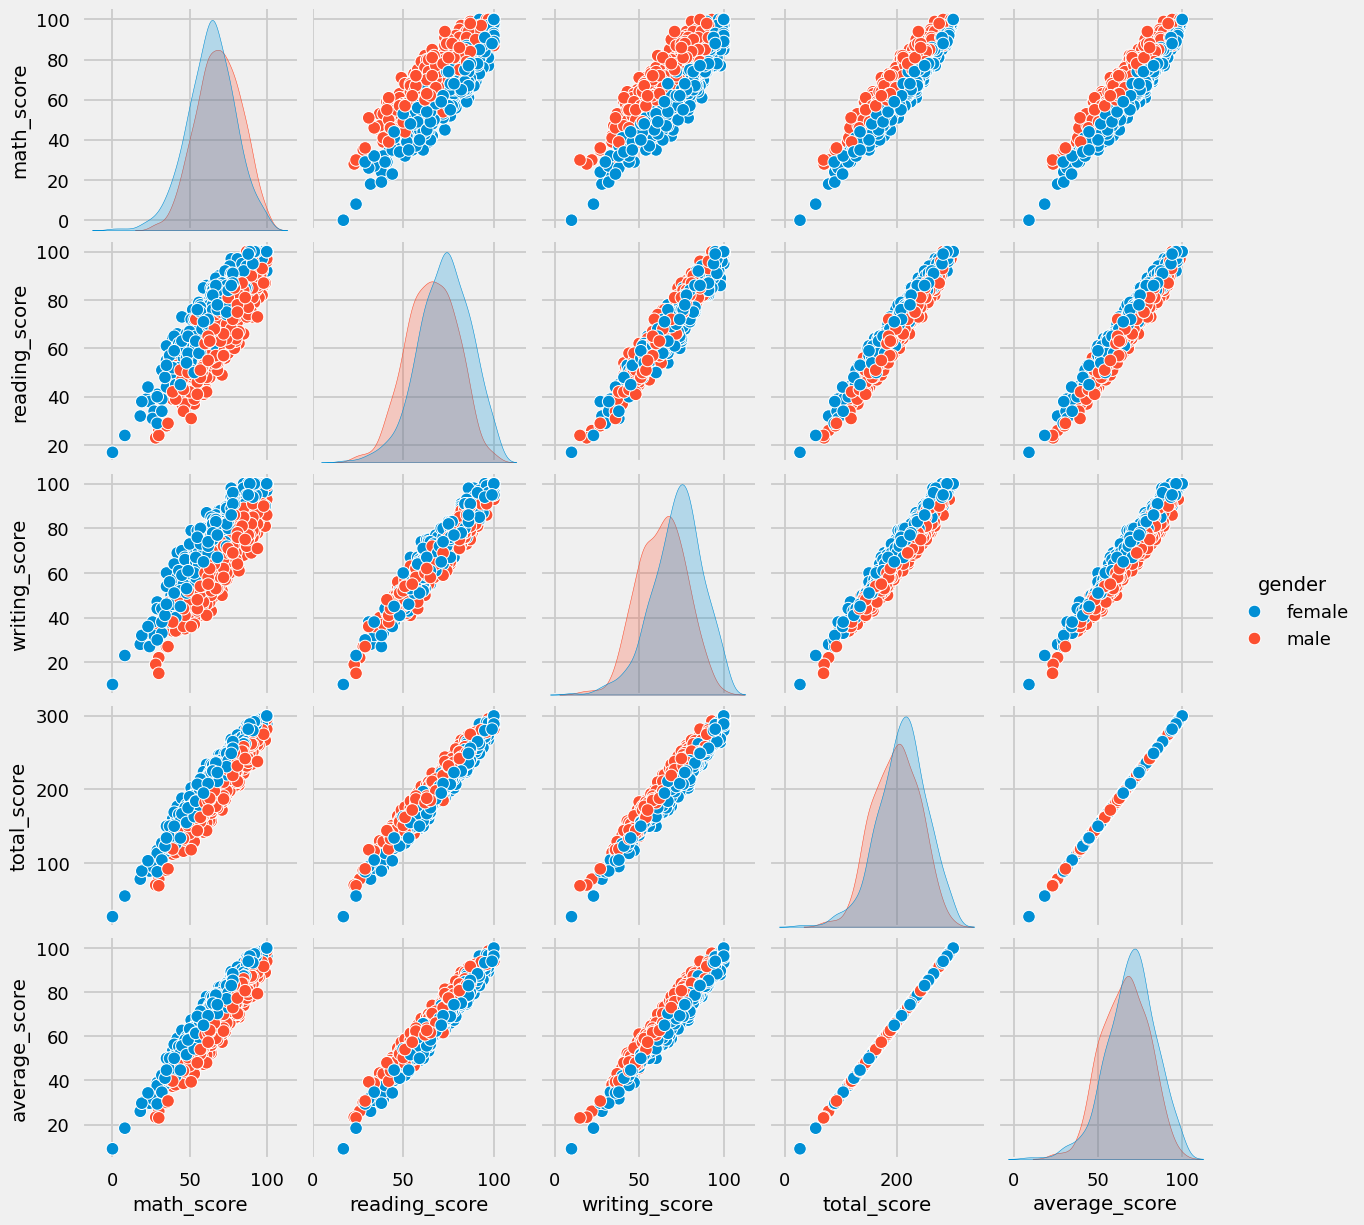

In [70]:
sns.pairplot(df, hue = 'gender')
plt.show

### 5 Conclusion 
    Students Performance is proportional to race, parental level of education, lunch.
    Eventhough, Students who completed test prepration score more than not completed. but it is not much corelated.
    Females score more than males
